### Preprocessing: 

- cleaning
- removing duplicates
- feature enegineering
- transformation(encoding,scaling) etc.



### Unclean Data 
- Dirty data( issues with content)
- Messy data (issues with structure) like while extarcted data from two different sources. so we get inconsistent data. as student name and st_name while merging it creates incosnistent.


Dirty data :
- - Duplicated data
- Missing data
- noisy data
- Inaccurate/invalid data :(anolmolies) like age can never be zero, weight and height is in negative, pin code is not in format 
- Inconsistent data  : Madrid and madrid , phone no  like 0110333 or 986629299
    
Dirty Data eg : 3.4kmph , company name and models value interchange..



### how to identify anomilies : using df.unique

### data quality dimension :
-completeness : no missing values

-validity: weight is not negative

-accuracy 

-consisitent : madrid and Madrid , delhi and dlh

## MISSING VALUES : NAN, None, Nat
### causes of missing values.

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns


##### Missing value Data

In [80]:
#adding missing values in dataframe : np.nan

df=pd.DataFrame({"A":[1,2,np.nan],"B":[5,np.nan,np.nan],"c":[1,2,3]})  #np.nan is used to add missing values 
df




,A,B,c
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


### Detection of missing values 

In [82]:
df.isnull() ## or isna()

,A,B,c
0,False,False,False
1,False,True,False
2,True,True,False


### Checking number of missing values in the data set

In [83]:
df.isnull().sum()  #to compute total missing values in all the columns

A    1
B    2
c    0
dtype: int64

### checking missing values in specific column

In [84]:
df["A"].isnull().sum()

1

In [85]:
df[["A","B"]].isnull().sum()  ## checking missing values of column A and B

A    1
B    2
dtype: int64

In [86]:
df[df["B"].isnull()] ## to get the those rows  where missing values exist of specific column

,A,B,c
1,2.0,NaN,2
2,NaN,NaN,3


In [90]:
a = pd.notnull(df)
a

,A,B,c
0,True,True,True
1,True,False,True
2,False,False,True


In [91]:
df[a]

,A,B,c
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [88]:
a=pd.notnull(df["A"])
a


0     True
1     True
2    False
Name: A, dtype: bool

In [12]:
df1=pd.read_csv("D:\\python_datascience\\data sets\\examples\\ex11.csv")
df1

,a,b,c,d,e
0,1,NaN,3.0,4.0,hello
1,5,6.0,NaN,NaN,world
2,9,10.0,11.0,NaN,foo


## checking missing values 

In [13]:
#creating dataFrame with some missing values  under age and height column
df1 = pd.DataFrame({"Age":[12,np.nan,14,np.nan,16,12,13,14,12,13],"Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121]})
df1

,Age,Height
0,12.0,130.0
1,NaN,NaN
2,14.0,133.0
3,NaN,143.0
4,16.0,123.0
5,12.0,NaN
6,13.0,NaN
7,14.0,NaN
8,12.0,120.0
9,13.0,121.0


# handling missing values: delete or fill with some values 

and also use domain knowledge to fill it .


Note this : Refer this link https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/


##### we can handle missing values  by 

1.filling with some values using fillna() method 


2.dropping the value

Missing values are handled using different interpolation techniques which estimate the missing values
from the other training examples.

fillna() method on the data frame is used for imputing missing values with mean, median, mode or constant value.


The goal is to find out which is a better measure of the central tendency of data and use that value 
for replacing missing values appropriately.



Plots such as box plots and distribution plots come very handily in deciding which techniques to use.


For symmetric data distribution, one can use the mean value for imputing missing values.

for skewed data use : median
    
    
Impute / Replace Missing Values with Mode : we can use mode for numeric and categorical  data 
    
    mostly mode use for categorical data 

In [14]:
#df1

,Age,Height
0,12.0,130.0
1,NaN,NaN
2,14.0,133.0
3,NaN,143.0
4,16.0,123.0
5,12.0,NaN
6,13.0,NaN
7,14.0,NaN
8,12.0,120.0
9,13.0,121.0


##### for intergal data we can fill missing value either by mean or median 
we use median : when we have few outliers(low and high values) and mostly we have values in specific range otherwise use meean




###mostly median is used

#### for categorical data : we use mode (most frequent value)

In [15]:
print(df1["Age"].mean())
print(df1["Age"].median())

13.25
13.0


### here , here median is close to mean , not much difference so there is no outlier.

### outlier is abnormaility or extreme values.

In [18]:

df1 = pd.DataFrame({"Age":[12,np.nan,14,np.nan,26,12,13,24,12,13],"Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121],"Gender":["m","f",np.nan,"m",np.nan,"f","m",np.nan,np.nan,"m"]})
df1


,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


In [17]:
df1["Age"].mean()

15.75

In [6]:
df1["Age"].median()  ## why median ?? as mean increases or decreases with change in values mean gets highly fluctuate as compare to median


13.0

## adding outliers  

In [68]:
df1 = pd.DataFrame({"Age":[12,np.nan,14,np.nan,26,12,13,24,12,13,200,400],"Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121,122,123],"Gender":["m","f",np.nan,"m",np.nan,"f","m",np.nan,np.nan,"m","m","m"]})
df1

,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


In [69]:
df1["Age"].mean()

72.6

In [70]:
df1["Age"].median()

13.5

so much difference between median and mean so there is a outlier but we can detect it uisng boxplot

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

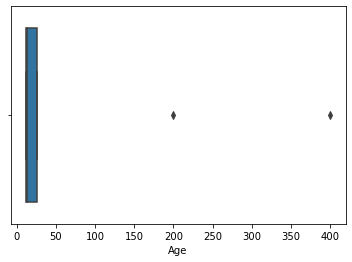

In [71]:
import seaborn as sns
sns.boxplot(df1["Age"])

######  so filling missing values of "age" column with median 

In [74]:
#df1.Age.fillna(df1.Age.median(),inplace=True)
#df1
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [75]:
df1

,Age,Height,Gender
0,12.0,130.0,m
1,13.5,NaN,f
2,14.0,133.0,NaN
3,13.5,143.0,m
4,26.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


## column dtypes 

In [25]:
df1.dtypes   # checking types of all columns

Age       float64
Height    float64
Gender     object
dtype: object

##### filling missing values of "gender"  column with its mode as it has categorical data 

mode :  (most frequent value)

In [26]:
df1["Gender"].mode()  #gives most frequent value(,ultiple modes can be there thats y it give series where indexing is there thts y , 0 is there

0    m
Name: Gender, dtype: object

In [27]:
#mode1=df1["Gender"].mode()[0]   : it fectches m from index 
df1.Gender.fillna(df1["Gender"].mode()[0],inplace=True)
df1


,Age,Height,Gender
0,12.0,130.0,m
1,13.0,NaN,f
2,14.0,133.0,m
3,13.0,143.0,m
4,26.0,123.0,m
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,m
8,12.0,120.0,m
9,13.0,121.0,m


In [12]:
## mode can have more than one values  mode is applicable to numeric and categorial data

In [28]:
x=pd.Series([1,2,4,4,2,1])
x.mode()

0    1
1    2
2    4
dtype: int64

In [29]:
x.mode()[0]

1

In [30]:
from collections import Counter  ## to get the frequency 
Counter(x)

Counter({1: 2, 2: 2, 4: 2})

##### removing missing values :  dropna()

In [76]:
# importing the datset and checking no of rows and columns import pandas as pd

data=pd.read_csv("D:\\python_datascience\\data sets\\upcoming-event.csv")
data



,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Mackenzie Dern,Marina Rodriguez,-195,165,51.282051,165.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,500,400.0,100,2800.0,900,380.0
1,Randy Brown,Jared Gooden,-265,215,37.735849,215.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,200,550.0,400,1600.0,215,500.0
2,Tim Elliott,Matheus Nicolau,155,-180,155.000000,55.555556,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,240,120.0,800,450.0,1600,650.0
3,Sabina Mazo,Mariya Agapova,-190,160,52.631579,160.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,130,350.0,800,800.0,350,750.0
4,Chris Gutierrez,Felipe Colares,-235,190,42.553191,190.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-110,400.0,1000,600.0,400,1200.0
5,Alexandr Romanov,Jared Vanderaa,-525,385,19.047619,385.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,450,1100.0,140,2200.0,165,700.0
6,Charles Rosa,Damon Jackson,165,-195,165.000000,51.282051,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,300,140.0,650,350.0,1100,700.0
7,Loopy Godinez,Silvana Gomez Juarez,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-135,NaN,700,NaN,400,NaN
8,Steve Garcia,Charlie Ontiveros,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,400,650.0,800,1400.0,-135,650.0


In [77]:
# this data has 119 columns : checking null values count in each column
data.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    1
r_sub_odds    0
b_sub_odds    1
r_ko_odds     0
b_ko_odds     1
Length: 119, dtype: int64

In [34]:
# here the data is big so we check null values for column 1 to 20
data.isnull().sum()[1:21]

B_fighter                0
R_odds                   0
B_odds                   0
R_ev                     0
B_ev                     0
date                     0
location                 0
country                  0
Winner                   9
title_bout               0
weight_class             0
gender                   0
no_of_rounds             0
B_current_lose_streak    0
B_current_win_streak     0
B_draw                   0
B_avg_SIG_STR_landed     0
B_avg_SIG_STR_pct        0
B_avg_SUB_ATT            0
B_avg_TD_landed          0
dtype: int64

In [43]:
#3 from above data we can see the column name winner has 9 null values meand in all rows  as follows so need to remove 
data.Winner

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
Name: Winner, dtype: float64

In [44]:

data.drop(columns=["Winner"],inplace=True)
data.shape  


(9, 118)

####  from above mentioned code  we found the column named winner which has 9 nan values so we deleted and check its shape is is showing 118 columns means winner column has been deleted

In [19]:
## fetching all columns name 
print(data.columns)
print(len(data.columns))
data.columns[1:20]


Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date',
       'location', 'country', 'Winner',
       ...
       'finish_details', 'finish_round', 'finish_round_time',
       'total_fight_time_secs', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds'],
      dtype='object', length=119)
119


Index(['B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender',
       'no_of_rounds', 'B_current_lose_streak', 'B_current_win_streak',
       'B_draw', 'B_avg_SIG_STR_landed', 'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT'],
      dtype='object')

### Checking missing values %

In [35]:
for i in data.columns:
    print(i,"---",data[i].isnull().sum()/data.shape[0]*100)

R_fighter --- 0.0
B_fighter --- 0.0
R_odds --- 0.0
B_odds --- 0.0
R_ev --- 0.0
B_ev --- 0.0
date --- 0.0
location --- 0.0
country --- 0.0
Winner --- 100.0
title_bout --- 0.0
weight_class --- 0.0
gender --- 0.0
no_of_rounds --- 0.0
B_current_lose_streak --- 0.0
B_current_win_streak --- 0.0
B_draw --- 0.0
B_avg_SIG_STR_landed --- 0.0
B_avg_SIG_STR_pct --- 0.0
B_avg_SUB_ATT --- 0.0
B_avg_TD_landed --- 0.0
B_avg_TD_pct --- 0.0
B_longest_win_streak --- 0.0
B_losses --- 0.0
B_total_rounds_fought --- 0.0
B_total_title_bouts --- 0.0
B_win_by_Decision_Majority --- 0.0
B_win_by_Decision_Split --- 0.0
B_win_by_Decision_Unanimous --- 0.0
B_win_by_KO/TKO --- 0.0
B_win_by_Submission --- 0.0
B_win_by_TKO_Doctor_Stoppage --- 0.0
B_wins --- 0.0
B_Stance --- 0.0
B_Height_cms --- 0.0
B_Reach_cms --- 0.0
B_Weight_lbs --- 0.0
R_current_lose_streak --- 0.0
R_current_win_streak --- 0.0
R_draw --- 0.0
R_avg_SIG_STR_landed --- 0.0
R_avg_SIG_STR_pct --- 0.0
R_avg_SUB_ATT --- 0.0
R_avg_TD_landed --- 0.0
R_avg_TD

In [36]:
## checking the columns which has null values greater than or equal to 70
for i in data.columns:
    if data[i].isnull().sum()/data.shape[0]*100>=70:
        data.drop(columns=[i],inplace=True)
    

In [37]:
data.shape

(9, 85)

In [38]:
#checking  rest of the columns which has missing values 
data.isna().sum()


R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    1
r_sub_odds    0
b_sub_odds    1
r_ko_odds     0
b_ko_odds     1
Length: 85, dtype: int64

In [39]:
data.isnull().sum()[1:20]

B_fighter                0
R_odds                   0
B_odds                   0
R_ev                     0
B_ev                     0
date                     0
location                 0
country                  0
title_bout               0
weight_class             0
gender                   0
no_of_rounds             0
B_current_lose_streak    0
B_current_win_streak     0
B_draw                   0
B_avg_SIG_STR_landed     0
B_avg_SIG_STR_pct        0
B_avg_SUB_ATT            0
B_avg_TD_landed          0
dtype: int64

In [40]:
data.isnull().sum()[20:40]

B_avg_TD_pct                    0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Stance                        0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_avg_SIG_STR_landed            0
dtype: int64

In [52]:
data.isnull().sum()[40:60]

R_avg_SIG_STR_pct               0
R_avg_SUB_ATT                   0
R_avg_TD_landed                 0
R_avg_TD_pct                    0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decision_Majority      0
R_win_by_Decision_Split         0
R_win_by_Decision_Unanimous     0
R_win_by_KO/TKO                 0
R_win_by_Submission             0
R_win_by_TKO_Doctor_Stoppage    0
R_wins                          0
R_Stance                        0
R_Height_cms                    0
R_Reach_cms                     0
R_Weight_lbs                    0
R_age                           0
dtype: int64

In [54]:
data.isnull().sum()[60:86]

B_age                     0
lose_streak_dif           0
win_streak_dif            0
longest_win_streak_dif    0
win_dif                   0
loss_dif                  0
total_round_dif           0
total_title_bout_dif      0
ko_dif                    0
sub_dif                   0
height_dif                0
reach_dif                 0
age_dif                   0
sig_str_dif               0
avg_sub_att_dif           0
avg_td_dif                0
empty_arena               0
constant_1                0
better_rank               0
r_dec_odds                0
b_dec_odds                1
r_sub_odds                0
b_sub_odds                1
r_ko_odds                 0
b_ko_odds                 1
dtype: int64

from above output it is showing that column name b_dec_odds ,b_sub_odds and b_ko_odds has 1 missing values so either we fill it ot delete it 
Recommended approach : not to delete as information will be lost 
but here we are deleting

In [25]:
# this command is used to delete all those columns which has at least one missing value
data.dropna(axis=1,inplace=True)
data.shape

(9, 82)

### issue with structure : unclean data 

In [41]:
import pandas as pd
df=sns.load_dataset("titanic")
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


survived ----alive
pclass---class
adult-male----sex...who
embarked_town---embarked

so we delete either one consider as as irrelavant or ambiguous

here we drop some columns to get good accuracy on Machilne learing model.  ::: **feature engineering**

In [42]:
df.drop(columns=["class","adult_male","embark_town","alive"],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,woman,B,True
888,0,3,female,NaN,1,2,23.4500,S,woman,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,man,C,True


In [43]:
for i in df.columns:
    print(i,"-----------",df[i].isnull().sum()/df.shape[0]*100)

survived ----------- 0.0
pclass ----------- 0.0
sex ----------- 0.0
age ----------- 19.865319865319865
sibsp ----------- 0.0
parch ----------- 0.0
fare ----------- 0.0
embarked ----------- 0.22446689113355783
who ----------- 0.0
deck ----------- 77.21661054994388
alone ----------- 0.0


## here deck has 70% plus missing values so consider as irrelavant so drop it.

In [44]:
df.drop(columns=["deck"],inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,male,22.0,1,0,7.2500,S,man,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False
2,1,3,female,26.0,0,0,7.9250,S,woman,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False
4,0,3,male,35.0,0,0,8.0500,S,man,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True
887,1,1,female,19.0,0,0,30.0000,S,woman,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False
889,1,1,male,26.0,0,0,30.0000,C,man,True


In [45]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

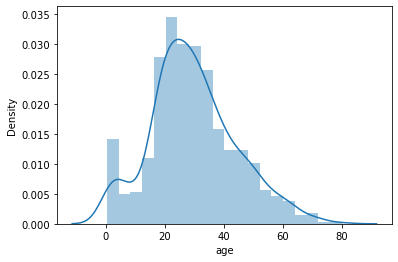

In [46]:
print(df["age"].unique())  ## to see 0 is present or not.
sns.distplot(df["age"])

### now fill the missing values of age column and embarked accordingly,

### checking columns types : to see all are in appropriate form or not. like age can be in object so transform it accordingly.

In [47]:
for i in df.columns:
    print(i,"----",df[i].dtypes)

survived ---- int64
pclass ---- int64
sex ---- object
age ---- float64
sibsp ---- int64
parch ---- int64
fare ---- float64
embarked ---- object
who ---- object
alone ---- bool


## describe

In [48]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df.describe(include="object")

,sex,embarked,who
count,891,889,891
unique,2,3,3
top,male,S,man
freq,577,644,537


### deleting nan values using dropna


In [50]:
##Dropping Rows with at least 1 null value.use : axis=0 and how='any'

#Data frame is read and all rows with any Null values are dropped. 


df=pd.DataFrame({"A":[1,2,np.nan,5],"B":[5,np.nan,np.nan,7],"c":[1,2,np.nan,9]})  #np.nan is used to add missing values 
df


,A,B,c
0,1.0,5.0,1.0
1,2.0,NaN,2.0
2,NaN,NaN,NaN
3,5.0,7.0,9.0


In [37]:
# making new data frame with dropped NA values
new_df = df.dropna(axis = 0, how ='any')
  
new_df

,A,B,c
0,1.0,5.0,1.0
3,5.0,7.0,9.0


In [28]:
##Dropping Rows with all null values.  use : axis=0 and how='all'



import numpy as np
import pandas as pd
df=pd.DataFrame({"A":[1,2,np.nan,5],"B":[5,np.nan,np.nan,7],"c":[1,2,np.nan,9]})  #np.nan is used to add missing values 
print(df)

# making new data frame with dropped NA values
new_df = df.dropna(axis = 0, how ='all')
  
print(new_df)

     A    B    c
0  1.0  5.0  1.0
1  2.0  NaN  2.0
2  NaN  NaN  NaN
3  5.0  7.0  9.0
     A    B    c
0  1.0  5.0  1.0
1  2.0  NaN  2.0
3  5.0  7.0  9.0


In [29]:
##Dropping columns with at least 1 null value. use : axis=1 and how='any'

#Data frame is read and all rows with any Null values are dropped. 

import numpy as np
import pandas as pd
df=pd.DataFrame({"A":[1,2,np.nan,5],"B":[5,np.nan,np.nan,np.nan],"c":[1,2,4,9]})  #np.nan is used to add missing values 
print(df)

# making new data frame with dropped NA values
new_df = df.dropna(axis = 1, how ='any')
  
print(new_df)

     A    B  c
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  4
3  5.0  NaN  9
   c
0  1
1  2
2  4
3  9


In [30]:
##Dropping columns with all null value. use : axix =1 and how=all


import numpy as np
import pandas as pd
df=pd.DataFrame({"A":[1,2,np.nan,5],"B":[np.nan,np.nan,np.nan,np.nan],"c":[1,2,4,9]})  #np.nan is used to add missing values 
print(df)

# making new data frame with dropped NA values
new_df = df.dropna(axis = 1, how ='all')
  
print(new_df)

     A   B  c
0  1.0 NaN  1
1  2.0 NaN  2
2  NaN NaN  4
3  5.0 NaN  9
     A  c
0  1.0  1
1  2.0  2
2  NaN  4
3  5.0  9


In [55]:
# calculating percentage of missing values of all the columns based on its percentage we delete the columns like mostly \
#delete 75% missing value column data considered as irrelavant rest the columns must be cleaned by fillna\
#if they have 1 or 2 missing value
import seaborn as sns
import numpy as np
data = sns.load_dataset('titanic')
data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
(data.isnull().sum()/data.shape[0])*100    # showing % of missing values of all the columns like deck has 77% missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### Detection of duplicated data 

Syntax : DataFrame.duplicated(subset = None, keep = ‘first’)
Parameters: 
subset: This Takes a column or list of column label. It’s default value is None. After passing columns, it will consider them only for duplicates.
keep: This Controls how to consider duplicate value. It has only three distinct value and default is ‘first’. 
 

- If ‘first’, This considers first value as unique and rest of the same values as duplicate.
- If ‘last’, This considers last value as unique and rest of the same values as duplicate.
- If ‘False’, This considers all of the same values as duplicates.
- Returns: Boolean Series denoting duplicate rows. 

In [51]:
#import pandas as pd  
emp = {"Name": ["Parker", "Smith", "William", "Parker","Parker"],  "Age": [21, 32, 29, 21,21]}  
df1 = pd.DataFrame(emp) 
df1

,Name,Age
0,Parker,21
1,Smith,32
2,William,29
3,Parker,21
4,Parker,21


In [73]:
bool_series = df1.duplicated() ## default keep =True
bool_series

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [70]:
df[bool_series]

,Name,Age
3,Parker,21
4,Parker,21


In [71]:
dup = df.duplicated(keep="last")
dup

0     True
1    False
2    False
3     True
4    False
dtype: bool

In [52]:
employees = [('Stuti', 28, 'Varanasi'),
            ('Saumya', 32, 'Delhi'),
            ('Aaditya', 25, 'Mumbai'),
            ('Saumya', 32, 'Delhi'),
            ('Saumya', 32, 'Delhi'),
            ('Saumya', 32, 'Mumbai'),
            ('Aaditya', 40, 'Dehradun'),
            ('Seema', 32, 'Delhi')
            ]
 
# Creating a DataFrame object 
df = pd.DataFrame(employees,columns = ['Name', 'Age', 'City'])
df

,Name,Age,City
0,Stuti,28,Varanasi
1,Saumya,32,Delhi
2,Aaditya,25,Mumbai
3,Saumya,32,Delhi
4,Saumya,32,Delhi
5,Saumya,32,Mumbai
6,Aaditya,40,Dehradun
7,Seema,32,Delhi


In [83]:
df[df.duplicated(keep=False)]

,Name,Age,City
1,Saumya,32,Delhi
3,Saumya,32,Delhi
4,Saumya,32,Delhi


In [85]:
dup = df.duplicated(subset=["Name","City"]) ## CONSIDEREING NAME AND CITY COLUMN VALUES FOR DETECTING DUPLICACY
df[dup]

,Name,Age,City
3,Saumya,32,Delhi
4,Saumya,32,Delhi


### Deleting duplicates 


DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)  


#### Parameters

subset: It takes a column or the list of column labels. It considers only certain columns for identifying duplicates. Default value None.

keep: It is used to control how to consider duplicate values. It has three distinct values that are as follows:

first: It drops the duplicate values except for the first occurrence.
last: It drops the duplicate values except for the last occurrence.
False: It drops all the duplicates.


inplace: Returns the boolean value. Default value is False.
If it is true, it removes the rows with duplicate values.

#### Return
Depending on the arguments passed, it returns the DataFrame with the removal of duplicate rows.

In [53]:
df = df.drop_duplicates() ## by default - keep = first 
df

,Name,Age,City
0,Stuti,28,Varanasi
1,Saumya,32,Delhi
2,Aaditya,25,Mumbai
5,Saumya,32,Mumbai
6,Aaditya,40,Dehradun
7,Seema,32,Delhi


### Messy data 

eg : 

In [54]:
employees = [('Stuti', 28, 'F',''),
            ('Saumya', 32, 'F',''),
            ('Aaditya', 25, '','m'),
            ('Saumya', 32, 'Fe',""),
            ('Saumya', 32, 'Fe',""),
            ('Saumya', 32, 'F',""),
            ('Aaditya', 40, '',"m"),
            ('Seema', 32, 'F',"")
            ]
# Creating a DataFrame object 
df = pd.DataFrame(employees,columns = ['Name', 'Age',"isfemale","ismale"])
df

,Name,Age,isfemale,ismale
0,Stuti,28,F,
1,Saumya,32,F,
2,Aaditya,25,,m
3,Saumya,32,Fe,
4,Saumya,32,Fe,
5,Saumya,32,F,
6,Aaditya,40,,m
7,Seema,32,F,


### how to clean in consistent data, anomilies no fixed method. mostly we use replace or regex

In [43]:
df["isfemale"].replace("Fe","F")
df

,Name,Age,isfemale,ismale
0,Stuti,28,F,
1,Saumya,32,F,
2,Aaditya,25,,m
3,Saumya,32,Fe,
4,Saumya,32,Fe,
5,Saumya,32,F,
6,Aaditya,40,,m
7,Seema,32,F,


In [44]:
df["isfemale"]=df["isfemale"].replace("Fe","F")
df

,Name,Age,isfemale,ismale
0,Stuti,28,F,
1,Saumya,32,F,
2,Aaditya,25,,m
3,Saumya,32,F,
4,Saumya,32,F,
5,Saumya,32,F,
6,Aaditya,40,,m
7,Seema,32,F,


In [45]:
df["isfemale"].isnull().sum()

0

In [46]:
df["isfemale"]=df["isfemale"].replace("","m")
df

,Name,Age,isfemale,ismale
0,Stuti,28,F,
1,Saumya,32,F,
2,Aaditya,25,m,m
3,Saumya,32,F,
4,Saumya,32,F,
5,Saumya,32,F,
6,Aaditya,40,m,m
7,Seema,32,F,


In [47]:
df.drop(columns=["ismale"],inplace=True)

In [48]:
df

,Name,Age,isfemale
0,Stuti,28,F
1,Saumya,32,F
2,Aaditya,25,m
3,Saumya,32,F
4,Saumya,32,F
5,Saumya,32,F
6,Aaditya,40,m
7,Seema,32,F


In [49]:
df.rename(columns={"isfemale":"gender"},inplace=True)

In [50]:
df  ## my clean data 

,Name,Age,gender
0,Stuti,28,F
1,Saumya,32,F
2,Aaditya,25,m
3,Saumya,32,F
4,Saumya,32,F
5,Saumya,32,F
6,Aaditya,40,m
7,Seema,32,F
